<IPython.core.display.Javascript object>


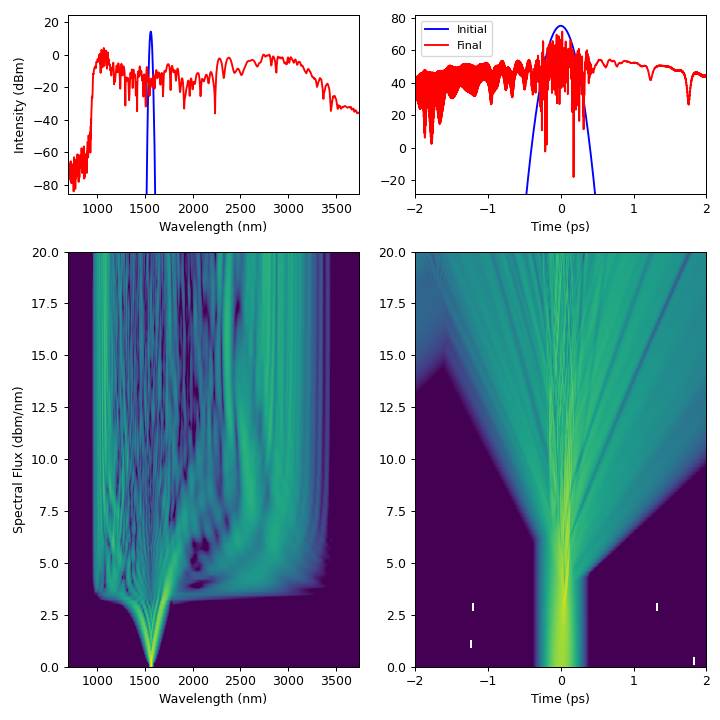

(<Figure size 800x800 with 4 Axes>,
 array([[<AxesSubplot:xlabel='Wavelength (nm)', ylabel='Intensity (dBm)'>,
         <AxesSubplot:xlabel='Time (ps)'>],
        [<AxesSubplot:xlabel='Wavelength (nm)', ylabel='Spectral Flux (dbm/nm)'>,
         <AxesSubplot:xlabel='Time (ps)'>]], dtype=object))

In [7]:
"""Trial run to see if we get the same results from the paper Sinclair et al,
     based on fiber, also currently what QuantX is usinmg for the clock."""

import laserfun as lf

%matplotlib notebook

FWHM = 0.400    # pulse duration (ps)
pulseWL = 1560  # pulse central wavelength (nm)

power = 0.272         # power (Watts)
rep_rate = 2e8        # repetition rate (Hz)

EPP = power/rep_rate    # Energy per pulse
GDD = False     # Group delay dispersion (ps^2)
TOD = False     # Third order dispersion (ps^3)

Window = 5.0    # simulation window (ps)
Steps = 100     # simulation steps
Points = 2**12  # simulation points
rtol = 1e-4     # relative error for NLSE integrator
atol = 1e-4     # absolute error

beta2 = -120    # (ps^2/km)
beta3 = 0.00    # (ps^3/km)
beta4 = 0.005   # (ps^4/km)

Length = 20     # length in mm

Alpha = 0       # loss (dB/cm)
Gamma = 1000    # nonlinearity (1/(W km))

Raman = True     # Enable Raman effect?
Steep = True     # Enable self steepening?

# create the pulse
pulse = lf.Pulse(pulse_type='gaussian', fwhm_ps=FWHM, center_wavelength_nm=pulseWL,
                 time_window_ps=Window, GDD=GDD, TOD=TOD, npts=Points, 
                 power_is_avg=True, epp=EPP)

# create the fiber!
fiber1 = lf.Fiber(Length * 1e-3, center_wl_nm=pulseWL, dispersion_format='GVD',
                  dispersion=(beta2*1e-3, beta3*1e-3, beta4*1e-3),
                  gamma_W_m=Gamma * 1e-3, loss_dB_per_m=Alpha*100)

# propagate the pulse using the NLSE
results = lf.NLSE(pulse, fiber1, raman=Raman, shock=Steep, nsaves=Steps,
                  rtol=rtol, atol=atol, print_status=False)

results.plot(wavelength=True, show=True, tlim=(-2, 2))

In [8]:
print(EPP)

1.36e-09
